In [2]:
from bs4 import BeautifulSoup as bs
from splinter import Browser
import time
import pymongo
#importing webdriver from selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np

In [12]:
#executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome',headless=True)

In [13]:
scrapable = ['Processors', 'Chipsets']
scrape = scrapable[0]

In [14]:
url = 'https://ark.intel.com/content/www/us/en/ark.html#@'+scrape
csvfilename = f'Intel_{scrape}.csv'
baseurl = 'https://ark.intel.com/'

browser.visit(url)

rootHTML = bs(browser.html, 'html.parser')

In [5]:
# rootHTML

In [142]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [17]:
client = pymongo.MongoClient('localhost', 27017)

In [18]:
db = client.IntelScrape
collection = db.items

In [19]:
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'IntelScrape'), 'items')

In [20]:
import pymongo

# Fonction pour insérer les données du dictionnaire dans la base de données MongoDB
def insert_data_into_database(data):
    # Connexion à la base de données MongoDB
    client = pymongo.MongoClient("mongodb://localhost:27017/")

    # Sélection de la base de données
    db = client.mydatabase

    # Sélection de la collection
    collection = db.mycollection

    # Insérer les données dans la collection
    if isinstance(data, dict):
        collection.insert_one(data)
    else:
        collection.insert_many(data)


In [25]:
# import pandas as pd
# wrapper = {}
# df = pd.DataFrame()

In [22]:
processor_name = []
for div in rootHTML.find_all('div', scrape):
    for link in rootHTML.\
        find_all('div', {'data-parent-panel-key':div['data-panel-key']})[0].\
        find_all('a'):
        browser.visit(baseurl+link['href'])
        time.sleep(1)
        for td in bs(browser.html, 'html.parser').find_all('td', class_='ark-product-name'):
            browser.visit(baseurl+td.a['href'])
            time.sleep(1)
            data = {'scrape':scrape}
            try:
                for c in bs(browser.html, 'html.parser').\
                    find_all('div', class_='arkProductSpecifications')[0].\
                    find_all('span', class_=['label','value']):
                    if c['class'][0] == 'label':
                        temp = c.text.strip().replace('.','_')
                            
                    else:
                            
                        data[temp] = c.text.strip()
                            #print(data)
                            #processor_list.append(data[temp])
                            #data[temp].append(c.text.strip())
                            #wrapper.update(data)
                                 
            except:
                print('failed '+link['href'])
                continue
                
                #df = df.concat([df, processor_list], axis=1)
                #wrapper.update(data)
                #i = i+2
                #insert_data_into_database(data)
            collection.insert_one(data)
            print(td.a.text, end='; ')

Intel® Core™ Ultra 3 Processor 105UL; Intel® Core™ Ultra 5 Processor 125HL; Intel® Core™ Ultra 5 Processor 125UL; Intel® Core™ Ultra 5 Processor 135HL; Intel® Core™ Ultra 5 Processor 135UL; Intel® Core™ Ultra 7 Processor 155HL; Intel® Core™ Ultra 7 Processor 155UL; Intel® Core™ Ultra 7 Processor 165HL; Intel® Core™ Ultra 7 Processor 165UL; Intel® Core™ Ultra 5 Processor 125H; Intel® Core™ Ultra 5 Processor 125U; Intel® Core™ Ultra 5 Processor 134U; Intel® Core™ Ultra 5 Processor 135H; Intel® Core™ Ultra 5 Processor 135U; Intel® Core™ Ultra 7 Processor 155H; Intel® Core™ Ultra 7 Processor 155U; Intel® Core™ Ultra 7 Processor 164U; Intel® Core™ Ultra 7 Processor 165H; Intel® Core™ Ultra 7 Processor 165U; Intel® Core™ Ultra 9 Processor 185H; Intel® Core™  7 processor 150HL; Intel® Core™ 3 processor 100HL; Intel® Core™ 3 processor 100UL; Intel® Core™ 5 processor 120HL; Intel® Core™ 5 processor 120UL; Intel® Core™ 5 processor 130HL; Intel® Core™ 5 processor 130UL; Intel® Core™ 7 processor 1

Intel® Core™ i9-11900F Processor; Intel® Core™ i9-11900K Processor; Intel® Core™ i9-11900KF Processor; Intel® Core™ i9-11900T Processor; Intel® Core™ i7-11850HE Processor; Intel® Core™ i7-11600H Processor; Intel® Core™ i7-11390H Processor; Intel® Core™ i7-1195G7 Processor; Intel® Core™ i7-1195G7 Processor; Intel® Core™ i7-11800H Processor; Intel® Core™ i7-11850H Processor; Intel® Core™ i7-11700 Processor; Intel® Core™ i7-11700F Processor; Intel® Core™ i7-11700K Processor; Intel® Core™ i7-11700KF Processor; Intel® Core™ i7-11700T Processor; Intel® Core™ i7-11370H Processor; Intel® Core™ i7-11375H Processor; Intel® Core™ i7-1180G7 Processor; Intel® Core™ i7-1185G7E Processor; Intel® Core™ i7-1185GRE Processor; Intel® Core™ i7-1160G7 Processor; Intel® Core™ i7-1165G7 Processor; Intel® Core™ i7-1165G7 Processor; Intel® Core™ i7-1185G7 Processor; Intel® Core™ i5-11500HE Processor; Intel® Core™ i5-11320H Processor; Intel® Core™ i5-1155G7 Processor; Intel® Core™ i5-1155G7 Processor; Intel® Co

Intel® Core™ i7-8700 Processor; Intel® Core™ i7-8700K Processor; Intel® Core™ i7-8550U Processor; Intel® Core™ i7-8650U Processor; Intel® Core™ i5-8260U Processor; Intel® Core™ i5-8257U Processor; Intel® Core™ i5-8279U Processor; Intel® Core™ i5-8365U Processor; Intel® Core™ i5-8310Y Processor; Intel® Core™ i5-8365UE Processor; Intel® Core™ i5-8210Y Processor; Intel® Core™ i5-8200Y Processor; Intel® Core™ i5-8265U Processor; Intel® Core™ i5-8305G Processor with Radeon™ Pro WX Vega M GL graphics; Intel® Core™ i5-8259U Processor; Intel® Core™ i5-8269U Processor; Intel® Core™ i5-8300H Processor; Intel® Core™ i5+8400 Processor  (9M Cache, up to 4.00 GHz) includes Intel® Optane™ Memory; Intel® Core™ i5-8400B Processor; Intel® Core™ i5-8400H Processor; Intel® Core™ i5-8400T Processor; Intel® Core™ i5-8500 Processor; Intel® Core™ i5+8500 Processor  (9M Cache, up to 4.10 GHz) includes Intel® Optane™ Memory; Intel® Core™ i5-8500B Processor; Intel® Core™ i5-8500T Processor; Intel® Core™ i5-8600 

Intel® Core™ i5-4690K Processor; Intel® Core™ i5-4460 Processor; Intel® Core™ i5-4460S Processor; Intel® Core™ i5-4460T Processor; Intel® Core™ i5-4590 Processor; Intel® Core™ i5-4590S Processor; Intel® Core™ i5-4590T Processor; Intel® Core™ i5-4690 Processor; Intel® Core™ i5-4690S Processor; Intel® Core™ i5-4690T Processor; Intel® Core™ i5-4210M Processor; Intel® Core™ i5-4210U Processor; Intel® Core™ i5-4220Y Processor; Intel® Core™ i5-4260U Processor; Intel® Core™ i5-4410E Processor; Intel® Core™ i5-4422E Processor; Intel® Core™ i5-4402EC Processor; Intel® Core™ i5-4310M Processor; Intel® Core™ i5-4310U Processor; Intel® Core™ i5-4340M Processor; Intel® Core™ i5-4360U Processor; Intel® Core™ i5-4200H Processor; Intel® Core™ i5-4200M Processor; Intel® Core™ i5-4202Y Processor; Intel® Core™ i5-4210Y Processor; Intel® Core™ i5-4300M Processor; Intel® Core™ i5-4300U Processor; Intel® Core™ i5-4300Y Processor; Intel® Core™ i5-4302Y Processor; Intel® Core™ i5-4330M Processor; Intel® Core™

Intel® Core™ i5-480M Processor; Intel® Core™ i3-380UM Processor; Intel® Core™ i5-470UM Processor; Intel® Core™ i3-560 Processor; Intel® Core™ i5-760 Processor; Intel® Core™ i3-370M Processor; Intel® Core™ i3-380M Processor; Intel® Core™ i5-460M Processor; Intel® Core™ i5-560M Processor; Intel® Core™ i5-560UM Processor; Intel® Core™ i5-580M Processor; Intel® Core™ i7-640M Processor; Intel® Core™ i7-660LM Processor; Intel® Core™ i7-680UM Processor; Intel® Core™ i7-740QM Processor; Intel® Core™ i7-840QM Processor; Intel® Core™ i7-940XM Processor Extreme Edition; Intel® Core™ i7-970 Processor; Intel® Core™ i3-550 Processor; Intel® Core™ i5-655K Processor; Intel® Core™ i7-875K Processor; Intel® Core™ i7-880 Processor; Intel® Core™ i3-330UM Processor; Intel® Core™ i5-430UM Processor; Intel® Core™ i5-540UM Processor; Intel® Core™ i7-660UM Processor; Intel® Core™ i5-450M Processor; Intel® Core™ i5-680 Processor; Intel® Core™ i7-870S Processor; Intel® Core™ i7-980X Processor Extreme Edition; In

Intel® Xeon® Gold 6403N Processor; Intel® Xeon® Gold 6423N Processor; Intel® Xeon® Gold 6433N Processor; Intel® Xeon® Gold 6433NE Processor; Intel® Xeon® Gold 6443N Processor; Intel® Xeon® Platinum 8444H Processor; Intel® Xeon® Platinum 8450H Processor; Intel® Xeon® Platinum 8452Y Processor; Intel® Xeon® Platinum 8454H Processor; Intel® Xeon® Platinum 8458P Processor; Intel® Xeon® Platinum 8460H Processor; Intel® Xeon® Platinum 8460Y+ Processor; Intel® Xeon® Platinum 8461V Processor; Intel® Xeon® Platinum 8462Y+ Processor; Intel® Xeon® Platinum 8468 Processor; Intel® Xeon® Platinum 8468H Processor; Intel® Xeon® Platinum 8468V Processor; Intel® Xeon® Platinum 8470 Processor; Intel® Xeon® Platinum 8470N Processor; Intel® Xeon® Platinum 8470Q Processor; Intel® Xeon® Platinum 8471N Processor; Intel® Xeon® Platinum 8480+ Processor; Intel® Xeon® Platinum 8490H Processor; Intel® Xeon® Gold 5411N Processor; Intel® Xeon® Gold 5412U Processor; Intel® Xeon® Gold 5415+ Processor; Intel® Xeon® Gold

Intel® Xeon® Silver 4109T Processor; Intel® Xeon® Silver 4110 Processor; Intel® Xeon® Silver 4112 Processor; Intel® Xeon® Silver 4114 Processor; Intel® Xeon® Silver 4114T Processor; Intel® Xeon® Silver 4116 Processor; Intel® Xeon® Silver 4116T Processor; Intel® Xeon® CPU Max 9460 Processor; Intel® Xeon® CPU Max 9462 Processor; Intel® Xeon® CPU Max 9468 Processor; Intel® Xeon® CPU Max 9470 Processor; Intel® Xeon® CPU Max 9480 Processor; Intel® Xeon® E-2414 Processor; Intel® Xeon® E-2434 Processor; Intel® Xeon® E-2436 Processor; Intel® Xeon® E-2456 Processor; Intel® Xeon® E-2468 Processor; Intel® Xeon® E-2478 Processor; Intel® Xeon® E-2486 Processor; Intel® Xeon® E-2488 Processor; Intel® Xeon® E-2314 Processor; Intel® Xeon® E-2324G Processor; Intel® Xeon® E-2334 Processor; Intel® Xeon® E-2336 Processor; Intel® Xeon® E-2356G Processor; Intel® Xeon® E-2374G Processor; Intel® Xeon® E-2378 Processor; Intel® Xeon® E-2378G Processor; Intel® Xeon® E-2386G Processor; Intel® Xeon® E-2388G Process

Intel® Xeon® Processor E7-8860 v3; Intel® Xeon® Processor E7-8867 v3; Intel® Xeon® Processor E7-8870 v3; Intel® Xeon® Processor E7-8880 v3; Intel® Xeon® Processor E7-8880L v3; Intel® Xeon® Processor E7-8890 v3; Intel® Xeon® Processor E7-8891 v3; Intel® Xeon® Processor E7-8893 v3; Intel® Xeon® Processor E7-2850 v2; Intel® Xeon® Processor E7-2870 v2; Intel® Xeon® Processor E7-2880 v2; Intel® Xeon® Processor E7-2890 v2; Intel® Xeon® Processor E7-4809 v2; Intel® Xeon® Processor E7-4820 v2; Intel® Xeon® Processor E7-4830 v2; Intel® Xeon® Processor E7-4850 v2; Intel® Xeon® Processor E7-4860 v2; Intel® Xeon® Processor E7-4870 v2; Intel® Xeon® Processor E7-4880 v2; Intel® Xeon® Processor E7-4890 v2; Intel® Xeon® Processor E7-8850 v2; Intel® Xeon® Processor E7-8857 v2; Intel® Xeon® Processor E7-8870 v2; Intel® Xeon® Processor E7-8880 v2; Intel® Xeon® Processor E7-8880L v2; Intel® Xeon® Processor E7-8890 v2; Intel® Xeon® Processor E7-8891 v2; Intel® Xeon® Processor E7-8893 v2; Intel® Xeon® Proce

Intel® Xeon® Processor E3-1505M v6; Intel® Xeon® Processor E3-1535M v6; Intel® Xeon® Processor E3-1501L v6; Intel® Xeon® Processor E3-1501M v6; Intel® Xeon® Processor E3-1558L v5; Intel® Xeon® Processor E3-1565L v5; Intel® Xeon® Processor E3-1578L v5; Intel® Xeon® Processor E3-1585 v5; Intel® Xeon® Processor E3-1585L v5; Intel® Xeon® Processor E3-1515M v5; Intel® Xeon® Processor E3-1545M v5; Intel® Xeon® Processor E3-1575M v5; Intel® Xeon® Processor E3-1220 v5; Intel® Xeon® Processor E3-1225 v5; Intel® Xeon® Processor E3-1230 v5; Intel® Xeon® Processor E3-1235L v5; Intel® Xeon® Processor E3-1240 v5; Intel® Xeon® Processor E3-1240L v5; Intel® Xeon® Processor E3-1245 v5; Intel® Xeon® Processor E3-1260L v5; Intel® Xeon® Processor E3-1268L v5; Intel® Xeon® Processor E3-1270 v5; Intel® Xeon® Processor E3-1275 v5; Intel® Xeon® Processor E3-1280 v5; Intel® Xeon® Processor E3-1505L v5; Intel® Xeon® Processor E3-1505M v5; Intel® Xeon® Processor E3-1535M v5; Intel® Xeon® Processor E3-1258L v4; I

Intel Atom® Processor C5310; Intel Atom® Processor C5315; Intel Atom® Processor C5320; Intel Atom® Processor C5325; Intel Atom® Processor C5335C1; Intel Atom® Processor C3338R; Intel Atom® Processor C3436L; Intel Atom® Processor C3558R; Intel Atom® Processor C3758R; Intel Atom® Processor C3336; Intel Atom® Processor C3308; Intel Atom® Processor C3508; Intel Atom® Processor C3538; Intel Atom® Processor C3558; Intel Atom® Processor C3708; Intel Atom® Processor C3750; Intel Atom® Processor C3758; Intel Atom® Processor C3808; Intel Atom® Processor C3830; Intel Atom® Processor C3850; Intel Atom® Processor C3858; Intel Atom® Processor C3950; Intel Atom® Processor C3955; Intel Atom® Processor C3958; Intel Atom® Processor C2316; Intel Atom® Processor C2516; Intel Atom® Processor C3338; Intel Atom® Processor C2308; Intel Atom® Processor C2508; Intel Atom® Processor C2338; Intel Atom® Processor C2350; Intel Atom® Processor C2358; Intel Atom® Processor C2518; Intel Atom® Processor C2530; Intel At

Intel® Pentium® Processor G2030; Intel® Pentium® Processor G2030T; Intel® Pentium® Processor G2120T; Intel® Pentium® Processor G2140; Intel® Pentium® Processor G2010; Intel® Pentium® Processor G2020; Intel® Pentium® Processor G2020T; Intel® Pentium® Processor G2130; Intel® Pentium® Processor G2100T; Intel® Pentium® Processor G2120; Intel® Pentium® Processor J6426; Intel® Pentium® Processor J4205; Intel® Pentium® Processor J3710; Intel® Pentium® Processor J2900; Intel® Pentium® Processor J2850; Intel® Pentium® Processor N6415; Intel® Pentium® Processor N4200E; Intel® Pentium® Processor N4200; Intel® Pentium® Processor N3710; Intel® Pentium® Processor N3700; Intel® Pentium® Processor N3540; Intel® Pentium® Processor N3530; Intel® Pentium® Processor N3520; Intel® Pentium® Processor N3510; Intel® Pentium® Processor 6805; Intel® Pentium® Processor 4405U; Intel® Pentium® Processor 4405Y; Intel® Pentium® Processor 3825U; Intel® Pentium® Processor 3805U; Intel® Pentium® Processor 3560M; Intel®

Intel® Pentium® III Processor 866 MHz, 256K Cache, 133 MHz FSB; Intel® Celeron® Processor G6900; Intel® Celeron® Processor G6900E; Intel® Celeron® Processor G6900T; Intel® Celeron® Processor G6900TE; Intel® Celeron® Processor G5905; Intel® Celeron® Processor G5905T; Intel® Celeron® Processor G5925; Intel® Celeron® Processor G5900; Intel® Celeron® Processor G5900E; Intel® Celeron® Processor G5900T; Intel® Celeron® Processor G5900TE; Intel® Celeron® Processor G5920; Intel® Celeron® Processor G4930E; Intel® Celeron® Processor G4932E; Intel® Celeron® Processor G4930; Intel® Celeron® Processor G4930T; Intel® Celeron® Processor G4950; Intel® Celeron® G4900 Processor; Intel® Celeron® G4900T Processor; Intel® Celeron® G4920 Processor; Intel® Celeron® Processor G3930E; Intel® Celeron® Processor G3930TE; Intel® Celeron® Processor G3930; Intel® Celeron® Processor G3930T; Intel® Celeron® Processor G3950; Intel® Celeron® Processor G3900E; Intel® Celeron® Processor G3902E; Intel® Celeron® Processor 

Intel® Celeron® D Processor 325/325J; Intel® Celeron® D Processor 326; Intel® Celeron® D Processor 330/330J; Intel® Celeron® D Processor 335/335J; Intel® Celeron® M Processor 320; Intel® Celeron® Processor 2.50 GHz, 128K Cache, 400 MHz FSB; Intel® Celeron® M Processor 600 MHz, 512K Cache, 400 MHz FSB; Intel® Celeron® Processor 2.00 GHz, 128K Cache, 400 MHz FSB; Intel® Celeron® Processor 1.70 GHz, 128K Cache, 400 MHz FSB; Mobile Intel® Celeron® Processor 2.20 GHz, 256K Cache, 400 MHz FSB; Mobile Intel® Celeron® Processor 2.40 GHz, 256K Cache, 400 MHz FSB; Mobile Intel® Celeron® Processor LV 650 MHz, 256K Cache, 100 MHz FSB; Intel® Celeron® Processor 566 MHz, 128K Cache, 66 MHz FSB; Intel® Celeron® Processor 733 MHz, 128K Cache, 66 MHz FSB; Intel® Celeron® Processor 850 MHz, 128K Cache, 100 MHz FSB; Intel® Celeron® Processor 433 MHz, 128K Cache, 66 MHz FSB; Intel® Celeron® Processor 300 MHz, 128K Cache, 66 MHz FSB; Intel® Celeron® Processor 366 MHz, 128K Cache, 66 MHz FSB; 

In [152]:
browser.quit()

In [26]:
## Saved data from database to csv file

In [24]:
import csv
with open(csvfilename,'w',newline='') as csvfile:
    cols = []
    data = db.items.find({'scrape':{'$eq':scrape}})
    for i in data:
        cols.extend([x for x in i.keys() if x not in cols])
    cols.remove('_id')
    cols.remove('scrape')
    
    writer = csv.DictWriter(csvfile, cols)
    writer.writeheader()
    for i in data.rewind():
        i.pop('_id')
        i.pop('scrape')
        writer.writerow(i)

# Exploration of Intel CPU release dataset

In [1]:
import pandas as pd

In [2]:
df_intel_processor = pd.read_csv("IntelArk3Processors.csv", dtype='str')

In [3]:
df_intel_processor

,Product Collection,Code Name,Vertical Segment,Processor Number,Recommended Customer Price,Total Cores,# of Performance-cores,# of Efficient-cores,# of Low Power Efficient-cores,Total Threads,...,Burst Frequency,Max Refresh Rate,Baseband Functions,RF Transceiver,RF Transceiver Functions,Protocol Stack,Intel® Smart Idle Technology,Intel® Quick Resume Technology,Intel® AC97 Technology,Intel® I/O Acceleration Technology
0,Intel® Core™ Ultra processors (Series 1)',Products formerly Meteor Lake',Mobile',125H',$375.00',14',4',8',2',18',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Intel® Core™ Ultra processors (Series 1)',Products formerly Meteor Lake',Mobile',125U',$363.00',12',2',8',2',14',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Intel® Core™ Ultra processors (Series 1)',Products formerly Meteor Lake',Mobile',134U',$332.00',12',2',8',2',14',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Intel® Core™ Ultra processors (Series 1)',Products formerly Meteor Lake',Mobile',135H',$342.00',14',4',8',2',18',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Intel® Core™ Ultra processors (Series 1)',Products formerly Meteor Lake',Mobile',135U',$332.00',12',2',8',2',14',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,Legacy Intel® Celeron® Processor,Products formerly Coppermine,Desktop,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5665,Legacy Intel® Celeron® Processor,Products formerly Coppermine,Desktop,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5666,Legacy Intel® Celeron® Processor,Products formerly Mendocino,Desktop,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5667,Legacy Intel® Celeron® Processor,Products formerly Mendocino,Desktop,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_intel_processor.describe()

,Product Collection,Code Name,Vertical Segment,Processor Number,Recommended Customer Price,Total Cores,# of Performance-cores,# of Efficient-cores,# of Low Power Efficient-cores,Total Threads,...,Burst Frequency,Max Refresh Rate,Baseband Functions,RF Transceiver,RF Transceiver Functions,Protocol Stack,Intel® Smart Idle Technology,Intel® Quick Resume Technology,Intel® AC97 Technology,Intel® I/O Acceleration Technology
count,5669,5669,5669,5547,2878,5669,612,530,22,4735,...,194,32,10,8,8,8,22,8,6,4
unique,218,208,12,5459,1516,54,32,14,2,66,...,68,16,7,8,8,6,4,2,2,2
top,Legacy Intel® Core™ Processors',Products formerly Haswell',Server',530',$309.00',2',6,8',2',4',...,3.00 GHz',60 Hz',n/a - WiFi only',n/a - WiFI only',n/a - WiFi only',n/a - WiFi only',Yes',No',No',No'
freq,345,256,905,3,22,809,72,129,11,597,...,8,6,2,1,1,2,10,4,3,2


**Extraction of columns of interest**

In [5]:
#Extraction of columns of interest
columns = ["Product Collection", "Processor Number", "Code Name", "Total Cores", "Launch Date", 
           "Intel® VT-x with Extended Page Tables (EPT) ‡",
           "Vertical Segment",
           "Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡", 
           "Intel® Virtualization Technology (VT-x) ‡", 
           "Intel® Virtualization Technology for Directed I/O (VT-d) ‡"
           ]
len(columns)

10

In [6]:
df_processor_extracted = df_intel_processor.loc[:, columns]

In [7]:
df_processor_extracted

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡
0,Intel® Core™ Ultra processors (Series 1)',125H',Products formerly Meteor Lake',14',"""Q4'23""",Yes',Mobile',No',Yes',Yes'
1,Intel® Core™ Ultra processors (Series 1)',125U',Products formerly Meteor Lake',12',"""Q4'23""",Yes',Mobile',No',Yes',Yes'
2,Intel® Core™ Ultra processors (Series 1)',134U',Products formerly Meteor Lake',12',"""Q4'23""",Yes',Mobile',Yes',Yes',Yes'
3,Intel® Core™ Ultra processors (Series 1)',135H',Products formerly Meteor Lake',14',"""Q4'23""",Yes',Mobile',Yes',Yes',Yes'
4,Intel® Core™ Ultra processors (Series 1)',135U',Products formerly Meteor Lake',12',"""Q4'23""",Yes',Mobile',Yes',Yes',Yes'
...,...,...,...,...,...,...,...,...,...,...
5664,Legacy Intel® Celeron® Processor,NaN,Products formerly Coppermine,1,Q1'00,NaN,Desktop,NaN,No,NaN
5665,Legacy Intel® Celeron® Processor,NaN,Products formerly Coppermine,1,Q1'00,NaN,Desktop,NaN,No,NaN
5666,Legacy Intel® Celeron® Processor,NaN,Products formerly Mendocino,1,Q2'99,NaN,Desktop,NaN,No,NaN
5667,Legacy Intel® Celeron® Processor,NaN,Products formerly Mendocino,1,Q1'99,NaN,Desktop,NaN,No,NaN


## Clean DataFrame

In [8]:
import json
import re

In [9]:
df_processor_extracted = df_processor_extracted.astype(str)

In [10]:
df_processor_extracted

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡
0,Intel® Core™ Ultra processors (Series 1)',125H',Products formerly Meteor Lake',14',"""Q4'23""",Yes',Mobile',No',Yes',Yes'
1,Intel® Core™ Ultra processors (Series 1)',125U',Products formerly Meteor Lake',12',"""Q4'23""",Yes',Mobile',No',Yes',Yes'
2,Intel® Core™ Ultra processors (Series 1)',134U',Products formerly Meteor Lake',12',"""Q4'23""",Yes',Mobile',Yes',Yes',Yes'
3,Intel® Core™ Ultra processors (Series 1)',135H',Products formerly Meteor Lake',14',"""Q4'23""",Yes',Mobile',Yes',Yes',Yes'
4,Intel® Core™ Ultra processors (Series 1)',135U',Products formerly Meteor Lake',12',"""Q4'23""",Yes',Mobile',Yes',Yes',Yes'
...,...,...,...,...,...,...,...,...,...,...
5664,Legacy Intel® Celeron® Processor,nan,Products formerly Coppermine,1,Q1'00,nan,Desktop,nan,No,nan
5665,Legacy Intel® Celeron® Processor,nan,Products formerly Coppermine,1,Q1'00,nan,Desktop,nan,No,nan
5666,Legacy Intel® Celeron® Processor,nan,Products formerly Mendocino,1,Q2'99,nan,Desktop,nan,No,nan
5667,Legacy Intel® Celeron® Processor,nan,Products formerly Mendocino,1,Q1'99,nan,Desktop,nan,No,nan


In [11]:
#Clean DataFrame
for column in columns:
    if column == "Launch Date":
        df_processor_extracted[column] = [re.sub('"', '', ept) for ept in df_processor_extracted[column]]
    else:
        df_processor_extracted[column] = [re.sub("'", '', ept) for ept in df_processor_extracted[column]]


#Replace some 0 by Q in Launch date column
launch_date = []
for date in df_processor_extracted["Launch Date"]:
    replace = [date.rsplit("'")[0].replace("0", "Q")]
    replace.append(date.rsplit("'")[1])
    replace.insert(1, "'")
    replace = ''.join(map(str, replace))
    launch_date.append(replace)

#Update Launch date column
df_processor_extracted.loc[:, "Launch Date"] = launch_date

In [12]:
df_processor_extracted

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡
0,Intel® Core™ Ultra processors (Series 1),125H,Products formerly Meteor Lake,14,Q4'23,Yes,Mobile,No,Yes,Yes
1,Intel® Core™ Ultra processors (Series 1),125U,Products formerly Meteor Lake,12,Q4'23,Yes,Mobile,No,Yes,Yes
2,Intel® Core™ Ultra processors (Series 1),134U,Products formerly Meteor Lake,12,Q4'23,Yes,Mobile,Yes,Yes,Yes
3,Intel® Core™ Ultra processors (Series 1),135H,Products formerly Meteor Lake,14,Q4'23,Yes,Mobile,Yes,Yes,Yes
4,Intel® Core™ Ultra processors (Series 1),135U,Products formerly Meteor Lake,12,Q4'23,Yes,Mobile,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
5664,Legacy Intel® Celeron® Processor,nan,Products formerly Coppermine,1,Q1'00,nan,Desktop,nan,No,nan
5665,Legacy Intel® Celeron® Processor,nan,Products formerly Coppermine,1,Q1'00,nan,Desktop,nan,No,nan
5666,Legacy Intel® Celeron® Processor,nan,Products formerly Mendocino,1,Q2'99,nan,Desktop,nan,No,nan
5667,Legacy Intel® Celeron® Processor,nan,Products formerly Mendocino,1,Q1'99,nan,Desktop,nan,No,nan


# Intel Server

In [13]:
df_processor_server = df_processor_extracted[
    df_processor_extracted["Vertical Segment"]=="Server"]

In [14]:
df_processor_server

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡
1133,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes
1134,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes
1135,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes
1136,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes
1137,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
5185,Intel® Pentium® Processor D Series,D1517,Products formerly Broadwell,4,Q4'15,Yes,Server,nan,Yes,Yes
5260,Intel® Pentium® Processor 1000 Series,1405,Products formerly Sandy Bridge EN,2,Q2'12,Yes,Server,nan,Yes,Yes
5400,Legacy Intel® Pentium® Processor,nan,Products formerly Tualatin,1,Q4'01,nan,Server,nan,No,nan
5401,Legacy Intel® Pentium® Processor,nan,Products formerly Tualatin,1,Q4'01,nan,Server,nan,No,nan


In [15]:
# #Check duplicates
# server = df_processor_server[df_processor_server.duplicated()]
# server

# Sort server processors  dataframe by launch date column

In [16]:
def sort_release_date(release_date):
    quarter_map = {"Q1": 1, "Q2": 2, "Q3": 3, "Q4": 4}
    quarter, year = release_date.split("'")
    return (int(year), quarter_map[quarter])


def sort_launch_date_column(launch_date_list):
    
    return sorted(launch_date_list, key=sort_release_date)

In [17]:
# df_processor_server_sorted = df_processor_server.sort_values(by="Launch Date", key=sort_launch_date_column,
#                                                             ignore_index=False)

In [18]:
# df_processor_server_sorted

In [19]:
#Create a copy of the dataframe
df_processor_server_copy = df_processor_server.copy()

In [20]:
values_year = [sort_release_date(year)[0] for year in df_processor_server["Launch Date"]]
values_quarter = [sort_release_date(year)[1] for year in df_processor_server["Launch Date"]]

df_processor_server_copy["Quarter"] = values_quarter
df_processor_server_copy["Year"] = values_year

#Sort dataframe by Year and Quarter
df_processor_server_copy_sorted = df_processor_server_copy.sort_values(by=["Year", "Quarter"], ascending=False,
                                                                      ignore_index=True)
df_processor_server_copy_sorted

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1805,Legacy Intel® Pentium® Processor,nan,Products formerly Tualatin,1,Q4'01,nan,Server,nan,No,nan,4,1
1806,Legacy Intel® Pentium® Processor,nan,Products formerly Tualatin,1,Q4'01,nan,Server,nan,No,nan,4,1
1807,Legacy Intel® Pentium® Processor,nan,Products formerly Tualatin,1,Q4'01,nan,Server,nan,No,nan,4,1
1808,Legacy Intel® Pentium® Processor,nan,Products formerly Tualatin,1,Q4'01,nan,Server,nan,No,nan,4,1


In [138]:
#export sorted processor dataframe to cvs
path = "hardware_feature_dataset/"
df_processor_server_copy_sorted.to_csv(path+"intel_sever_sorted.csv")

In [21]:
# df_processor_server_copy

In [22]:
#Sort dataframe by Year
# df_processor_server_copy_sorted = df_processor_server_copy.sort_values(by=["Year", "Quarter"], ascending=False)
# df_processor_server_copy_sorted

In [23]:
#Sort dataframe by Quarter
# df_processor_server_copy_sorted = df_processor_server_copy.sort_values(by="Quater", ascending=False)
# df_processor_server_copy_sorted

In [24]:
#a = df_processor_server_copy_sorted["Launch Date"]

In [25]:
#a[1770:1810]

In [26]:
# release_year = [sort_release_date(year)[0] for year in df_processor_server["Launch Date"]]
# release_year

In [27]:
# sorted(release_year, reverse=True)

In [28]:
# from operator import itemgetter, attrgetter
# a = sorted(release_year, key=itemgetter(0))
# a

In [29]:
# df_processor_server_sorted["Launch Date"][80:120]

In [30]:
# l = ["Q4'23", "Q3'17", "Q2'18"]
# sort_launch_date_column(l)

# Intel processor for each feature

<font color=blue>***Extended Page Tables***</font>

In [91]:
#All processor incorporating ept
df_processor_with_ept = df_processor_server_copy_sorted[
    df_processor_server_copy_sorted["Intel® VT-x with Extended Page Tables (EPT) ‡"]=="Yes"]

In [92]:
df_processor_with_ept

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1785,Legacy Intel® Xeon® Processors,nan,Products formerly Sossaman,2,Q1'06,Yes,Server,nan,Yes,nan,1,6
1786,Legacy Intel® Xeon® Processors,nan,Products formerly Sossaman,2,Q1'06,Yes,Server,nan,Yes,nan,1,6
1787,Legacy Intel® Xeon® Processors,nan,Products formerly Sossaman,2,Q1'06,Yes,Server,nan,Yes,nan,1,6
1788,Legacy Intel® Xeon® Processors,nan,Products formerly Sossaman,2,Q1'06,Yes,Server,nan,Yes,nan,1,6


In [139]:
#export processor that support ept to cvs
path = "hardware_feature_dataset/"
df_processor_with_ept.to_csv(path+"processor_with_ept.csv")

<font color=blue>***Code Data and Prioritization***</font>

In [33]:
#First intel family to introduce CDP is Intel® Xeon® processor E5 v4 family
df_first_processor_with_cdp = df_processor_server_copy_sorted[
    df_processor_server_copy_sorted["Product Collection"].str.contains("Intel® Xeon® processor E5 v4 family",
                                                                      regex=False, case=False)]
df_first_processor_with_cdp

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
900,Intel® Xeon® Processor E5 v4 Family,E5-2699AV4,Products formerly Broadwell,22,Q4'16,Yes,Server,nan,Yes,Yes,4,16
901,Intel® Xeon® Processor E5 v4 Family,E5-2699AV4,Products formerly Broadwell,22,Q4'16,Yes,Server,nan,Yes,Yes,4,16
916,Intel® Xeon® Processor E5 v4 Family,E5-4610V4,Products formerly Broadwell,10,Q2'16,Yes,Server,nan,Yes,Yes,2,16
917,Intel® Xeon® Processor E5 v4 Family,E5-4620V4,Products formerly Broadwell,10,Q2'16,Yes,Server,nan,Yes,Yes,2,16
918,Intel® Xeon® Processor E5 v4 Family,E5-4627V4,Products formerly Broadwell,10,Q2'16,Yes,Server,nan,Yes,Yes,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Intel® Xeon® Processor E5 v4 Family,E5-2695V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1014,Intel® Xeon® Processor E5 v4 Family,E5-2697V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1015,Intel® Xeon® Processor E5 v4 Family,E5-2697AV4,Products formerly Broadwell,16,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1016,Intel® Xeon® Processor E5 v4 Family,E5-2698V4,Products formerly Broadwell,20,Q1'16,Yes,Server,nan,Yes,Yes,1,16


In [34]:
#Processors above the first processor to integrate CDP
# df_processor_with_cdp = df_processor_server_copy_sorted[df_processor_server_copy_sorted["Year"]>15]
# df_processor_with_cdp

In [35]:
#Processors above the first processor to integrate CDP
df_processor_with_cdp = df_processor_server_copy_sorted.iloc[:1018, :]
df_processor_with_cdp

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Intel® Xeon® Processor E5 v4 Family,E5-2695V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1014,Intel® Xeon® Processor E5 v4 Family,E5-2697V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1015,Intel® Xeon® Processor E5 v4 Family,E5-2697AV4,Products formerly Broadwell,16,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1016,Intel® Xeon® Processor E5 v4 Family,E5-2698V4,Products formerly Broadwell,20,Q1'16,Yes,Server,nan,Yes,Yes,1,16


In [140]:
#export processor that support cdp to cvs
path = "hardware_feature_dataset/"
df_processor_with_cdp.to_csv(path+"processor_with_cdp.csv")

<font color=blue>***Virtual processor Identification***</font>

The first Intel processor family to introduce VPID (Virtual Processor Identifier) was the Intel Nehalem microarchitecture, specifically the Nehalem-EP (Xeon 5500) series, which was released in 2009.

In [36]:
#First intel family to introduce VPID is Legacy Intel® Xeon® processor Nehalem-EP family
df_first_processor_with_vpid = df_processor_server_copy_sorted[
    df_processor_server_copy_sorted["Code Name"].str.contains("Nehalem",
                                                                      regex=False, case=False)]
df_first_processor_with_vpid

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
1551,Legacy Intel® Xeon® Processors,E5503,Products formerly Nehalem EP,2,Q1'10,Yes,Server,nan,Yes,Yes,1,10
1552,Legacy Intel® Xeon® Processors,E5507,Products formerly Nehalem EP,4,Q1'10,Yes,Server,nan,Yes,Yes,1,10
1553,Legacy Intel® Xeon® Processors,E6510,Products formerly Nehalem EX,4,Q1'10,Yes,Server,nan,Yes,nan,1,10
1554,Legacy Intel® Xeon® Processors,E6540,Products formerly Nehalem EX,6,Q1'10,Yes,Server,nan,Yes,nan,1,10
1555,Legacy Intel® Xeon® Processors,E7520,Products formerly Nehalem EX,4,Q1'10,Yes,Server,nan,Yes,nan,1,10
1556,Legacy Intel® Xeon® Processors,E7530,Products formerly Nehalem EX,6,Q1'10,Yes,Server,nan,Yes,nan,1,10
1557,Legacy Intel® Xeon® Processors,E7540,Products formerly Nehalem EX,6,Q1'10,Yes,Server,nan,Yes,nan,1,10
1558,Legacy Intel® Xeon® Processors,L7545,Products formerly Nehalem EX,6,Q1'10,Yes,Server,nan,Yes,nan,1,10
1559,Legacy Intel® Xeon® Processors,L7555,Products formerly Nehalem EX,8,Q1'10,Yes,Server,nan,Yes,nan,1,10
1561,Legacy Intel® Xeon® Processors,X6550,Products formerly Nehalem EX,8,Q1'10,Yes,Server,nan,Yes,nan,1,10


In [37]:
#Processors above the first processor to integrate VPID
#Except the Three last lignes
# df_processor_with_vpid = df_processor_server_copy_sorted[df_processor_server_copy_sorted["Year"]>=9]
# df_processor_with_vpid

In [38]:
#Processors above the first processor to integrate VPID
df_processor_with_vpid = df_processor_server_copy_sorted.iloc[:1651, :]
df_processor_with_vpid

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1646,Legacy Intel® Xeon® Processors,W3570,Products formerly Bloomfield,4,Q1'09,Yes,Server,nan,Yes,nan,1,9
1647,Legacy Intel® Xeon® Processors,W5580,Products formerly Nehalem EP,4,Q1'09,Yes,Server,nan,Yes,Yes,1,9
1648,Legacy Intel® Xeon® Processors,X5550,Products formerly Nehalem EP,4,Q1'09,Yes,Server,nan,Yes,Yes,1,9
1649,Legacy Intel® Xeon® Processors,X5560,Products formerly Nehalem EP,4,Q1'09,Yes,Server,nan,Yes,Yes,1,9


In [141]:
#export processor that support vpid to cvs
path = "hardware_feature_dataset/"
df_processor_with_vpid.to_csv(path+"processor_with_vpid.csv")

<font color=blue>***Cache Allocation Technologie***</font>

Originally introduced on a limited set of communications processors in the Xeon E5-2600 v3 Family of Server
processors, the CAT feature is enhanced and now available on all SKUs starting with the Xeon E5 v4 family. The
Xeon E5 v4 family provides more CLOS than prior-generation processors, enabling more flexible usage of CAT,
and CPUID-based enumeration support, enabling software which uses CAT to be reused across generations
with fewer changes.

In [39]:
#First intel family to introduce CAT
df_first_processor_with_cat = df_processor_server_copy_sorted[
    df_processor_server_copy_sorted["Product Collection"].str.contains("Intel® Xeon® Processor E5 v4 Family",
                                                                      regex=False, case=False)]
df_first_processor_with_cat

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
900,Intel® Xeon® Processor E5 v4 Family,E5-2699AV4,Products formerly Broadwell,22,Q4'16,Yes,Server,nan,Yes,Yes,4,16
901,Intel® Xeon® Processor E5 v4 Family,E5-2699AV4,Products formerly Broadwell,22,Q4'16,Yes,Server,nan,Yes,Yes,4,16
916,Intel® Xeon® Processor E5 v4 Family,E5-4610V4,Products formerly Broadwell,10,Q2'16,Yes,Server,nan,Yes,Yes,2,16
917,Intel® Xeon® Processor E5 v4 Family,E5-4620V4,Products formerly Broadwell,10,Q2'16,Yes,Server,nan,Yes,Yes,2,16
918,Intel® Xeon® Processor E5 v4 Family,E5-4627V4,Products formerly Broadwell,10,Q2'16,Yes,Server,nan,Yes,Yes,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Intel® Xeon® Processor E5 v4 Family,E5-2695V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1014,Intel® Xeon® Processor E5 v4 Family,E5-2697V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1015,Intel® Xeon® Processor E5 v4 Family,E5-2697AV4,Products formerly Broadwell,16,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1016,Intel® Xeon® Processor E5 v4 Family,E5-2698V4,Products formerly Broadwell,20,Q1'16,Yes,Server,nan,Yes,Yes,1,16


In [40]:
#Processors above the first processor to integrate CAT
df_processor_with_cat = df_processor_server_copy_sorted.iloc[:1018, :]
df_processor_with_cat

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Intel® Xeon® Processor E5 v4 Family,E5-2695V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1014,Intel® Xeon® Processor E5 v4 Family,E5-2697V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1015,Intel® Xeon® Processor E5 v4 Family,E5-2697AV4,Products formerly Broadwell,16,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1016,Intel® Xeon® Processor E5 v4 Family,E5-2698V4,Products formerly Broadwell,20,Q1'16,Yes,Server,nan,Yes,Yes,1,16


In [41]:
#Processors above the first processor to integrate CAT
# df_processor_with_cat = df_processor_server_copy_sorted[df_processor_server_copy_sorted["Year"]>=16]
# df_processor_with_cat

In [142]:
#export processor that support cat to cvs
path = "hardware_feature_dataset/"
df_processor_with_cat.to_csv(path+"processor_with_cat.csv")

<font color=blue>***Page Modification Logging***</font>

The first Intel processor family to introduce PML (Page Modification Logging) was the Intel Haswell microarchitecture, specifically the Haswell-EP (Xeon E5 v3) series, which was released in 2014.

In [42]:
#First intel family to introduce PML
df_first_processor_with_pml = df_processor_server_copy_sorted[
    df_processor_server_copy_sorted["Product Collection"].str.contains("Intel® Xeon® Processor E5 v3",
                                                                      regex=False, case=False)]
df_first_processor_with_pml

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
1076,Intel® Xeon® Processor E5 v3 Family,E5-4610V3,Products formerly Haswell,10,Q2'15,Yes,Server,nan,Yes,Yes,2,15
1077,Intel® Xeon® Processor E5 v3 Family,E5-4620V3,Products formerly Haswell,10,Q2'15,Yes,Server,nan,Yes,Yes,2,15
1078,Intel® Xeon® Processor E5 v3 Family,E5-4627V3,Products formerly Haswell,10,Q2'15,Yes,Server,nan,Yes,Yes,2,15
1079,Intel® Xeon® Processor E5 v3 Family,E5-4640V3,Products formerly Haswell,12,Q2'15,Yes,Server,nan,Yes,Yes,2,15
1080,Intel® Xeon® Processor E5 v3 Family,E5-4650V3,Products formerly Haswell,12,Q2'15,Yes,Server,nan,Yes,Yes,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Intel® Xeon® Processor E5 v3 Family,E5-2690V3,Products formerly Haswell,12,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1166,Intel® Xeon® Processor E5 v3 Family,E5-2695V3,Products formerly Haswell,14,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1167,Intel® Xeon® Processor E5 v3 Family,E5-2697V3,Products formerly Haswell,14,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1168,Intel® Xeon® Processor E5 v3 Family,E5-2698V3,Products formerly Haswell,16,Q3'14,Yes,Server,nan,Yes,Yes,3,14


In [43]:
#Processors above the first processor to integrate PML
df_processor_with_pml = df_processor_server_copy_sorted.iloc[:1170, :]
   
df_processor_with_pml 

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Intel® Xeon® Processor E5 v3 Family,E5-2690V3,Products formerly Haswell,12,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1166,Intel® Xeon® Processor E5 v3 Family,E5-2695V3,Products formerly Haswell,14,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1167,Intel® Xeon® Processor E5 v3 Family,E5-2697V3,Products formerly Haswell,14,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1168,Intel® Xeon® Processor E5 v3 Family,E5-2698V3,Products formerly Haswell,16,Q3'14,Yes,Server,nan,Yes,Yes,3,14


In [44]:
# #First intel family to introduce PML

# df_first_processor_with_pml = df_processor_server_copy_sorted[
#     df_processor_server_copy_sorted["Code Name"].str.contains("Haswell",
#                                                                       regex=False, case=False)]
# df_first_processor_with_pml

In [45]:
# #Processors above the first processor to integrate PML
# link = "https://fr.wikipedia.org/wiki/Haswell_(microarchitecture)#:~:text=Haswell%20est%20la%20micro%2Darchitecture,du%20m%C3%AAme%20nom)%20et%20Broadwell."
# df_processor_with_pml = df_processor_server_copy_sorted[df_processor_server_copy_sorted["Year"]>=14]
# df_processor_with_pml

In [143]:
#export processor that support pml to cvs
path = "hardware_feature_dataset/"
df_processor_with_pml.to_csv(path+"processor_with_pml.csv")

<font color=blue>***Cache Monitoring Technology***</font>

Intel® Xeon® Processor E5 v3 Family

In [46]:
#First intel family to introduce CMT
df_first_processor_with_cmt = df_processor_server_copy_sorted[
    df_processor_server_copy_sorted["Product Collection"].str.contains("Intel® Xeon® Processor E5 v3 Family",
                                                                      regex=False, case=False)]
df_first_processor_with_cmt

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
1076,Intel® Xeon® Processor E5 v3 Family,E5-4610V3,Products formerly Haswell,10,Q2'15,Yes,Server,nan,Yes,Yes,2,15
1077,Intel® Xeon® Processor E5 v3 Family,E5-4620V3,Products formerly Haswell,10,Q2'15,Yes,Server,nan,Yes,Yes,2,15
1078,Intel® Xeon® Processor E5 v3 Family,E5-4627V3,Products formerly Haswell,10,Q2'15,Yes,Server,nan,Yes,Yes,2,15
1079,Intel® Xeon® Processor E5 v3 Family,E5-4640V3,Products formerly Haswell,12,Q2'15,Yes,Server,nan,Yes,Yes,2,15
1080,Intel® Xeon® Processor E5 v3 Family,E5-4650V3,Products formerly Haswell,12,Q2'15,Yes,Server,nan,Yes,Yes,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Intel® Xeon® Processor E5 v3 Family,E5-2690V3,Products formerly Haswell,12,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1166,Intel® Xeon® Processor E5 v3 Family,E5-2695V3,Products formerly Haswell,14,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1167,Intel® Xeon® Processor E5 v3 Family,E5-2697V3,Products formerly Haswell,14,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1168,Intel® Xeon® Processor E5 v3 Family,E5-2698V3,Products formerly Haswell,16,Q3'14,Yes,Server,nan,Yes,Yes,3,14


In [47]:
#Processors above the first processor to integrate CMT
df_processor_with_cmt = df_processor_server_copy_sorted.iloc[:1170, :]
   
df_processor_with_cmt 

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Intel® Xeon® Processor E5 v3 Family,E5-2690V3,Products formerly Haswell,12,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1166,Intel® Xeon® Processor E5 v3 Family,E5-2695V3,Products formerly Haswell,14,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1167,Intel® Xeon® Processor E5 v3 Family,E5-2697V3,Products formerly Haswell,14,Q3'14,Yes,Server,nan,Yes,Yes,3,14
1168,Intel® Xeon® Processor E5 v3 Family,E5-2698V3,Products formerly Haswell,16,Q3'14,Yes,Server,nan,Yes,Yes,3,14


In [144]:
#export processor that support cmt to cvs
path = "hardware_feature_dataset/"
df_processor_with_cmt.to_csv(path+"processor_with_cmt.csv")

<font color=blue>***Memory Bandwidth Monitoring***</font>

In [48]:
#First intel family to introduce mbm
df_first_processor_with_mbm = df_processor_server_copy_sorted[
    df_processor_server_copy_sorted["Product Collection"].str.contains("Intel® Xeon® Processor E5 v4 Family",
                                                                      regex=False, case=False)]
df_first_processor_with_mbm

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
900,Intel® Xeon® Processor E5 v4 Family,E5-2699AV4,Products formerly Broadwell,22,Q4'16,Yes,Server,nan,Yes,Yes,4,16
901,Intel® Xeon® Processor E5 v4 Family,E5-2699AV4,Products formerly Broadwell,22,Q4'16,Yes,Server,nan,Yes,Yes,4,16
916,Intel® Xeon® Processor E5 v4 Family,E5-4610V4,Products formerly Broadwell,10,Q2'16,Yes,Server,nan,Yes,Yes,2,16
917,Intel® Xeon® Processor E5 v4 Family,E5-4620V4,Products formerly Broadwell,10,Q2'16,Yes,Server,nan,Yes,Yes,2,16
918,Intel® Xeon® Processor E5 v4 Family,E5-4627V4,Products formerly Broadwell,10,Q2'16,Yes,Server,nan,Yes,Yes,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Intel® Xeon® Processor E5 v4 Family,E5-2695V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1014,Intel® Xeon® Processor E5 v4 Family,E5-2697V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1015,Intel® Xeon® Processor E5 v4 Family,E5-2697AV4,Products formerly Broadwell,16,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1016,Intel® Xeon® Processor E5 v4 Family,E5-2698V4,Products formerly Broadwell,20,Q1'16,Yes,Server,nan,Yes,Yes,1,16


In [49]:
#Processors above the first processor to integrate MBM
df_processor_with_mbm = df_processor_server_copy_sorted.iloc[:1018, :]
df_processor_with_mbm

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Intel® Xeon® Processor E5 v4 Family,E5-2695V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1014,Intel® Xeon® Processor E5 v4 Family,E5-2697V4,Products formerly Broadwell,18,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1015,Intel® Xeon® Processor E5 v4 Family,E5-2697AV4,Products formerly Broadwell,16,Q1'16,Yes,Server,nan,Yes,Yes,1,16
1016,Intel® Xeon® Processor E5 v4 Family,E5-2698V4,Products formerly Broadwell,20,Q1'16,Yes,Server,nan,Yes,Yes,1,16


In [145]:
#export processor that support mbm to cvs
path = "hardware_feature_dataset/"
df_processor_with_mbm.to_csv(path+"processor_with_mbm.csv")

<font color=blue>***Memory Bandwidth Allocation***</font>

Intel® Xeon® Scalable Processors

In [50]:
#First intel family to introduce mba
df_first_processor_with_mba = df_processor_server_copy_sorted[
    df_processor_server_copy_sorted["Product Collection"].str.contains("Intel® Xeon® Scalable Processors",
                                                                      regex=False, case=False)]
df_first_processor_with_mba

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
847,Intel® Xeon® Scalable Processors,4112,Products formerly Skylake,4,Q3'17,Yes,Server,nan,Yes,Yes,3,17
848,Intel® Xeon® Scalable Processors,4114,Products formerly Skylake,10,Q3'17,Yes,Server,nan,Yes,Yes,3,17
849,Intel® Xeon® Scalable Processors,4114T,Products formerly Skylake,10,Q3'17,Yes,Server,nan,Yes,Yes,3,17
850,Intel® Xeon® Scalable Processors,4116,Products formerly Skylake,12,Q3'17,Yes,Server,nan,Yes,Yes,3,17


In [51]:
#Processors above the first processor to integrate MBA
df_processor_with_mba = df_processor_server_copy_sorted.iloc[:852, :]
df_processor_with_mba

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
847,Intel® Xeon® Scalable Processors,4112,Products formerly Skylake,4,Q3'17,Yes,Server,nan,Yes,Yes,3,17
848,Intel® Xeon® Scalable Processors,4114,Products formerly Skylake,10,Q3'17,Yes,Server,nan,Yes,Yes,3,17
849,Intel® Xeon® Scalable Processors,4114T,Products formerly Skylake,10,Q3'17,Yes,Server,nan,Yes,Yes,3,17
850,Intel® Xeon® Scalable Processors,4116,Products formerly Skylake,12,Q3'17,Yes,Server,nan,Yes,Yes,3,17


In [146]:
#export processor that support mba to cvs
path = "hardware_feature_dataset/"
df_processor_with_mba.to_csv(path+"processor_with_mba.csv")

<font color=blue>***Sub page protection***</font>

Products formerly Ice Lake <br>
link : https://lwn.net/Articles/810033/

In [52]:
#First intel family to introduce spp
df_first_processor_with_spp = df_processor_server_copy_sorted[
    df_processor_server_copy_sorted["Code Name"].str.contains("Products formerly Ice Lake",
                                                                      regex=False, case=False)]
df_first_processor_with_spp

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
41,Intel® Xeon® D Processor,D-1813NT,Products formerly Ice Lake,4,Q4'23,nan,Server,nan,Yes,Yes,4,23
42,Intel® Xeon® D Processor,D-1823NT,Products formerly ICE LAKE,6,Q4'23,nan,Server,nan,Yes,Yes,4,23
43,Intel® Xeon® D Processor,D-1834,Products formerly ICE LAKE,8,Q4'23,nan,Server,nan,Yes,Yes,4,23
44,Intel® Xeon® D Processor,D-1844NT,Products formerly ICE LAKE,10,Q4'23,nan,Server,nan,Yes,Yes,4,23
45,Intel® Xeon® D Processor,D-1846,Products formerly ICE LAKE,10,Q4'23,nan,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
427,3rd Generation Intel® Xeon® Scalable Processors,4309Y,Products formerly Ice Lake,8,Q2'21,Yes,Server,nan,Yes,Yes,2,21
428,3rd Generation Intel® Xeon® Scalable Processors,4310,Products formerly Ice Lake,12,Q2'21,Yes,Server,nan,Yes,Yes,2,21
429,3rd Generation Intel® Xeon® Scalable Processors,4310T,Products formerly Ice Lake,10,Q2'21,Yes,Server,nan,Yes,Yes,2,21
430,3rd Generation Intel® Xeon® Scalable Processors,4314,Products formerly Ice Lake,16,Q2'21,Yes,Server,nan,Yes,Yes,2,21


In [53]:
#Processors above the first processor to integrate spp
df_processor_with_spp = df_processor_server_copy_sorted.iloc[:432, :]
df_processor_with_spp

,Product Collection,Processor Number,Code Name,Total Cores,Launch Date,Intel® VT-x with Extended Page Tables (EPT) ‡,Vertical Segment,Intel® Virtualization Technology with Redirect Protection (VT-rp) ‡,Intel® Virtualization Technology (VT-x) ‡,Intel® Virtualization Technology for Directed I/O (VT-d) ‡,Quarter,Year
0,5th Generation Intel® Xeon® Scalable Processors,3508U,Products formerly Sapphire Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
1,5th Generation Intel® Xeon® Scalable Processors,5512U,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
2,5th Generation Intel® Xeon® Scalable Processors,5515+,Products formerly Emerald Rapids,8,Q4'23,Yes,Server,nan,Yes,Yes,4,23
3,5th Generation Intel® Xeon® Scalable Processors,5520+,Products formerly Emerald Rapids,28,Q4'23,Yes,Server,nan,Yes,Yes,4,23
4,5th Generation Intel® Xeon® Scalable Processors,6526Y,Products formerly Emerald Rapids,16,Q4'23,Yes,Server,nan,Yes,Yes,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
427,3rd Generation Intel® Xeon® Scalable Processors,4309Y,Products formerly Ice Lake,8,Q2'21,Yes,Server,nan,Yes,Yes,2,21
428,3rd Generation Intel® Xeon® Scalable Processors,4310,Products formerly Ice Lake,12,Q2'21,Yes,Server,nan,Yes,Yes,2,21
429,3rd Generation Intel® Xeon® Scalable Processors,4310T,Products formerly Ice Lake,10,Q2'21,Yes,Server,nan,Yes,Yes,2,21
430,3rd Generation Intel® Xeon® Scalable Processors,4314,Products formerly Ice Lake,16,Q2'21,Yes,Server,nan,Yes,Yes,2,21


In [147]:
#export processor that support spp to cvs
path = "hardware_feature_dataset/"
df_processor_with_spp.to_csv(path+"processor_with_spp.csv")

# Grid5000 processor available

In [172]:
link_g5k = "https://www.grid5000.fr/w/Hardware"
df_g5k_processors = pd.read_html(link_g5k)
df_g5k_processors[1]

Site      Cluster Access Condition Date of arrival  \
          Site      Cluster Access Condition Date of arrival   
0     Grenoble         dahu              NaN      2018-03-22   
1     Grenoble         drac  exotic job type      2020-10-05   
2     Grenoble       servan  exotic job type      2021-12-15   
3     Grenoble        troll  exotic job type      2019-12-23   
4     Grenoble         yeti  exotic job type      2018-01-16   
5        Lille      chiclet              NaN      2018-08-06   
6        Lille     chifflot              NaN      2018-08-01   
7        Lille       chirop              NaN      2024-01-25   
8   Luxembourg  petitprince              NaN      2013-09-10   
9         Lyon       gemini  exotic job type      2019-09-01   
10        Lyon      hercule              NaN      2012-10-02   
11        Lyon      neowise  exotic job type      2021-05-17   
12        Lyon         nova              NaN      2016-12-01   
13        Lyon        orion              NaN      2012-09-14   
14        Lyon        pyxis  exotic job type      2020-01-06   
15        Lyon   sagittaire              NaN      2006-07-01   
16        Lyon       sirius  exotic job type      2021-11-18   
17        Lyon       taurus              NaN      2012-09-14   
18       Nancy         gros              NaN      2019-09-04   
19       Nancy     grouille  exotic job type      2021-01-13   
20      Nantes      econome              NaN      2014-04-16   
21      Nantes      ecotype              NaN      2017-10-16   
22      Rennes     parasilo              NaN      2015-01-13   
23      Rennes    paravance              NaN      2015-01-13   
24      Sophia          uvb              NaN      2011-01-04   
25    Toulouse       estats  exotic job type      2023-06-13   
26    Toulouse     montcalm              NaN      2022-12-01   

   Manufacturing date Nodes CPU                                          \
   Manufacturing date Nodes   #                      Name         Cores   
0          2017-12-12    32   2      Intel Xeon Gold 6130  16 cores/CPU   
1          2016-10-17    12   2         IBM POWER8NVL 1.0  10 cores/CPU   
2          2021-12-10     2   2             AMD EPYC 7352  24 cores/CPU   
3          2019-11-21     4   2      Intel Xeon Gold 5218  16 cores/CPU   
4          2017-12-26     4   4      Intel Xeon Gold 6130  16 cores/CPU   
5          2018-07-27     8   2             AMD EPYC 7301  16 cores/CPU   
6          2018-07-17     8   2      Intel Xeon Gold 6126  12 cores/CPU   
7          2023-05-02     5   2  Intel Xeon Platinum 8358  32 cores/CPU   
8          2012-10-30    11   2       Intel Xeon E5-2630L   6 cores/CPU   
9          2019-06-12     2   2     Intel Xeon E5-2698 v4  20 cores/CPU   
10         2012-07-19     4   2        Intel Xeon E5-2620   6 cores/CPU   
11         2021-05-17    10   1             AMD EPYC 7642  48 cores/CPU   
12         2016-10-28    22   2     Intel Xeon E5-2620 v4   8 cores/CPU   
13         2012-07-16     3   2        Intel Xeon E5-2630   6 cores/CPU   
14         2019-11-07     4   2     Cavium ThunderX2 99xx  32 cores/CPU   
15         2006-07-01    10   2           AMD Opteron 250    1 core/CPU   
16         2021-11-24     1   2             AMD EPYC 7742  64 cores/CPU   
17         2012-07-16    12   2        Intel Xeon E5-2630   6 cores/CPU   
18         2019-07-16   124   1      Intel Xeon Gold 5220  18 cores/CPU   
19         2020-12-07     2   2             AMD EPYC 7452  32 cores/CPU   
20         2012-06-28    22   2        Intel Xeon E5-2660   8 cores/CPU   
21         2017-07-11    48   2    Intel Xeon E5-2630L v4  10 cores/CPU   
22         2015-01-13    27   2     Intel Xeon E5-2630 v3   8 cores/CPU   
23         2015-01-13    72   2     Intel Xeon E5-2630 v3   8 cores/CPU   
24         2011-01-04    30   2          Intel Xeon X5670   6 cores/CPU   
25         2022-12-01    12   1             Nvidia Carmel   8 cores/CPU   
26         2022-11-06    10   2    Intel Xeon Silver 

In [173]:
df_g5k_processors[2]

Site    Cluster  Access Condition Date of arrival Manufacturing date  \
      Site    Cluster  Access Condition Date of arrival Manufacturing date   
0    Nancy   graffiti  production queue      2019-06-07         2019-05-27   
1    Nancy     grappe  production queue      2020-08-20         2020-07-09   
2    Nancy       grat  production queue      2022-09-07         2022-06-22   
3    Nancy      grele  production queue      2017-06-26         2017-06-07   
4    Nancy  grosminet  production queue      2023-12-05         2023-11-30   
5    Nancy   grostiti  production queue      2024-01-10         2015-10-23   
6    Nancy       grue  production queue      2019-11-25         2019-11-15   
7    Nancy      gruss  production queue      2021-08-26         2021-06-24   
8    Nancy    grvingt  production queue      2018-04-11         2018-04-01   
9   Rennes    abacus1  production queue      2023-10-24         2016-07-27   
10  Rennes    abacus2  production queue      2023-11-10         2017-08-15   
11  Rennes    abacus3  production queue      2023-10-13         2017-07-05   
12  Rennes    abacus4  production queue      2023-10-09         2017-11-13   
13  Rennes    abacus5  production queue      2023-10-24         2018-05-06   
14  Rennes    abacus8  production queue      2023-11-17         2018-11-09   
15  Rennes    abacus9  production queue      2023-11-06         2018-12-12   
16  Rennes   abacus10  production queue      2023-10-30         2018-12-03   
17  Rennes   abacus11  production queue      2023-10-24         2018-12-03   
18  Rennes   abacus12  production queue      2023-11-17         2019-10-28   
19  Rennes   abacus14  production queue      2023-11-08         2019-09-26   
20  Rennes   abacus16  production queue      2023-10-16         2019-09-26   
21  Rennes   abacus17  production queue      2023-11-17         2020-11-25   
22  Rennes   abacus18  production queue      2023-10-11         2020-11-13   
23  Rennes   abacus19  production queue      2023-11-17         2020-11-12   
24  Rennes   abacus20  production queue      2023-10-11         2020-12-29   
25  Rennes   abacus21  production queue      2023-10-24         2021-08-02   
26  Rennes   abacus22  production queue      2023-12-04         2022-01-14   
27  Rennes   abacus25  production queue      2023-06-05         2022-10-24   
28  Rennes   paranoia  production queue      2014-02-21         2013-11-22   
29  Rennes   roazhon1  production queue      2023-10-24         2018-09-20   
30  Rennes   roazhon2  production queue      2023-09-06         2018-10-22   
31  Rennes   roazhon3  production queue      2023-10-24         2018-11-12   
32  Rennes   roazhon4  production queue      2023-09-06         2020-12-01   
33  Rennes   roazhon5  production queue      2023-10-13         2015-04-06   
34  Rennes   roazhon6  production queue      2023-10-24         2017-10-25   
35  Rennes   roazhon7  production queue      2023-12-20         2017-06-27   
36  Rennes   roazhon8  production queue      2023-10-24         2017-06-22   
37  Rennes   roazhon9  production queue      2023-10-09         2017-12-15   
38  Rennes  roazhon10  production queue      2023-10-24         2019-09-25   
39  Rennes  roazhon11  production queue      2023-10-24         2012-09-14   
40  Rennes  roazhon12  production queue      2023-10-24         2012-09-14   
41  Rennes  roazhon13  production queue      2023-10-06         2019-09-25   

   Nodes CPU                                                      Memory  \
   Nodes   #                    Name         Cores Architecture   Memory   
0     13   2  Intel Xeon Silver 4110   8 cores/CPU       x86_64  128 GiB   
1     16   2   Intel Xeon Gold 5218R  20 cores/CPU       x86_64   96 GiB   
2      1   2           AMD EPYC 7513  32 cores/CPU       x86_64  512 GiB   
3     14   2   Intel Xeon E5-2650 v4  12 cores/CPU       x86_64  128 GiB   
4      1   4   Intel Xeon Gold 6240L  18 cores/CPU       x86_64  6.0 TiB   
5      1   4   Intel Xeon E7-4850 v3  14 

In [174]:
df_g5k_processors[3]

Site   Cluster Access Condition Date of arrival Manufacturing date Nodes  \
     Site   Cluster Access Condition Date of arrival Manufacturing date Nodes   
0   Lille      chuc    testing queue      2024-01-22         2023-05-02     8   
1  Rennes  paradoxe    testing queue      2024-01-02         2023-05-27    32   

  CPU                                                    Memory  \
    #                  Name         Cores Architecture   Memory   
0   1         AMD EPYC 7513  32 cores/CPU       x86_64  512 GiB   
1   2  Intel Xeon Gold 5320  26 cores/CPU       x86_64  384 GiB   

                         Storage               Network  \
                         Storage               Network   
0  1.92 TB SSD + 3 x 1.92 TB SSD  2 x 25 Gbps (SR‑IOV)   
1      1.92 TB SSD + 1.92 TB SSD               25 Gbps   

               Accelerators  
               Accelerators  
0  4 x Nvidia A100 (40 GiB)  
1                       NaN

In [175]:

df_g5k_processors = pd.concat([df_g5k_processors[1], df_g5k_processors[2], df_g5k_processors[2]], 
                              ignore_index=True)
df_g5k_processors

Site    Cluster  Access Condition Date of arrival Manufacturing date  \
         Site    Cluster  Access Condition Date of arrival Manufacturing date   
0    Grenoble       dahu               NaN      2018-03-22         2017-12-12   
1    Grenoble       drac   exotic job type      2020-10-05         2016-10-17   
2    Grenoble     servan   exotic job type      2021-12-15         2021-12-10   
3    Grenoble      troll   exotic job type      2019-12-23         2019-11-21   
4    Grenoble       yeti   exotic job type      2018-01-16         2017-12-26   
..        ...        ...               ...             ...                ...   
106    Rennes   roazhon9  production queue      2023-10-09         2017-12-15   
107    Rennes  roazhon10  production queue      2023-10-24         2019-09-25   
108    Rennes  roazhon11  production queue      2023-10-24         2012-09-14   
109    Rennes  roazhon12  production queue      2023-10-24         2012-09-14   
110    Rennes  roazhon13  production queue      2023-10-06         2019-09-25   

    Nodes CPU                                                   \
    Nodes   #                  Name         Cores Architecture   
0      32   2  Intel Xeon Gold 6130  16 cores/CPU       x86_64   
1      12   2     IBM POWER8NVL 1.0  10 cores/CPU      ppc64le   
2       2   2         AMD EPYC 7352  24 cores/CPU       x86_64   
3       4   2  Intel Xeon Gold 5218  16 cores/CPU       x86_64   
4       4   4  Intel Xeon Gold 6130  16 cores/CPU       x86_64   
..    ...  ..                   ...           ...          ...   
106     4   2  Intel Xeon Gold 5118  12 cores/CPU       x86_64   
107     4   2  Intel Xeon Gold 5220  18 cores/CPU       x86_64   
108     3   2    Intel Xeon E5-2660   8 cores/CPU       x86_64   
109     4   2    Intel Xeon E5-2660   8 cores/CPU       x86_64   
110     8   2  Intel Xeon Gold 6254  18 cores/CPU       x86_64   

                     Memory                                        Storage  \
                     Memory                                        Storage   
0                   192 GiB           240 GB SSD + 480 GB SSD + 4.0 TB HDD   
1                   128 GiB                        1.0 TB HDD + 1.0 TB HDD   
2                   128 GiB                        1.6 TB SSD + 1.6 TB SSD   
3    384 GiB + 1.5 TiB PMEM                        480 GB SSD + 1.6 TB SSD   
4                   768 GiB  480 GB SSD + 3 x 2.0 TB HDD* + 2 x 1.6 TB SSD   
..                      ...                                            ...   
106                 512 GiB                                     1.2 TB HDD   
107                 384 GiB                       239 GB HDD + 1.92 TB HDD   
108                  64 GiB                                     597 GB HDD   
109                 128 GiB                                     597 GB HDD   
110                 384 GiB                                     1.0 TB HDD   

                                   Network                    Accelerators  
                                   Network                    Accelerators  
0             10 Gbps + 100 Gbps Omni-Path                             NaN  
1        10 Gbps + 2 x 100 Gbps InfiniBand  4 x Nvidia Tesla P100 (16 GiB)  
2     25 Gbps + 2 x 100 Gbps FPGA/Ethernet               Xilinx Alveo U200  
3    25 Gbps (SR‑IOV) + 100 Gbps Omni-Path                             NaN  
4             10 Gbps + 100 Gbps Omni-Path                             NaN  
..                                     ...                             ...  
106                                10 Gbps                             NaN  
107                                10 Gbps                             NaN  
108                        1 Gbps (SR‑IOV)                             NaN  
109                        1 Gbps (SR‑IOV)                             NaN  
110                                10 Gbps                             NaN  

[111 rows x 14 columns]

**Remove multi-level column index**

In [176]:
df_g5k_processors.columns = df_g5k_processors.columns.droplevel()
df_g5k_processors

,Site,Cluster,Access Condition,Date of arrival,Manufacturing date,Nodes,#,Name,Cores,Architecture,Memory,Storage,Network,Accelerators
0,Grenoble,dahu,NaN,2018-03-22,2017-12-12,32,2,Intel Xeon Gold 6130,16 cores/CPU,x86_64,192 GiB,240 GB SSD + 480 GB SSD + 4.0 TB HDD,10 Gbps + 100 Gbps Omni-Path,NaN
1,Grenoble,drac,exotic job type,2020-10-05,2016-10-17,12,2,IBM POWER8NVL 1.0,10 cores/CPU,ppc64le,128 GiB,1.0 TB HDD + 1.0 TB HDD,10 Gbps + 2 x 100 Gbps InfiniBand,4 x Nvidia Tesla P100 (16 GiB)
2,Grenoble,servan,exotic job type,2021-12-15,2021-12-10,2,2,AMD EPYC 7352,24 cores/CPU,x86_64,128 GiB,1.6 TB SSD + 1.6 TB SSD,25 Gbps + 2 x 100 Gbps FPGA/Ethernet,Xilinx Alveo U200
3,Grenoble,troll,exotic job type,2019-12-23,2019-11-21,4,2,Intel Xeon Gold 5218,16 cores/CPU,x86_64,384 GiB + 1.5 TiB PMEM,480 GB SSD + 1.6 TB SSD,25 Gbps (SR‑IOV) + 100 Gbps Omni-Path,NaN
4,Grenoble,yeti,exotic job type,2018-01-16,2017-12-26,4,4,Intel Xeon Gold 6130,16 cores/CPU,x86_64,768 GiB,480 GB SSD + 3 x 2.0 TB HDD* + 2 x 1.6 TB SSD,10 Gbps + 100 Gbps Omni-Path,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Rennes,roazhon9,production queue,2023-10-09,2017-12-15,4,2,Intel Xeon Gold 5118,12 cores/CPU,x86_64,512 GiB,1.2 TB HDD,10 Gbps,NaN
107,Rennes,roazhon10,production queue,2023-10-24,2019-09-25,4,2,Intel Xeon Gold 5220,18 cores/CPU,x86_64,384 GiB,239 GB HDD + 1.92 TB HDD,10 Gbps,NaN
108,Rennes,roazhon11,production queue,2023-10-24,2012-09-14,3,2,Intel Xeon E5-2660,8 cores/CPU,x86_64,64 GiB,597 GB HDD,1 Gbps (SR‑IOV),NaN
109,Rennes,roazhon12,production queue,2023-10-24,2012-09-14,4,2,Intel Xeon E5-2660,8 cores/CPU,x86_64,128 GiB,597 GB HDD,1 Gbps (SR‑IOV),NaN


# Extract Intel processors from G5K processors dataframe

In [177]:
df_g5k_intel_processor = df_g5k_processors[
    df_g5k_processors["Name"].str.contains("Intel Xeon", regex=False, case=False)]

df_g5k_intel_processor

,Site,Cluster,Access Condition,Date of arrival,Manufacturing date,Nodes,#,Name,Cores,Architecture,Memory,Storage,Network,Accelerators
0,Grenoble,dahu,NaN,2018-03-22,2017-12-12,32,2,Intel Xeon Gold 6130,16 cores/CPU,x86_64,192 GiB,240 GB SSD + 480 GB SSD + 4.0 TB HDD,10 Gbps + 100 Gbps Omni-Path,NaN
3,Grenoble,troll,exotic job type,2019-12-23,2019-11-21,4,2,Intel Xeon Gold 5218,16 cores/CPU,x86_64,384 GiB + 1.5 TiB PMEM,480 GB SSD + 1.6 TB SSD,25 Gbps (SR‑IOV) + 100 Gbps Omni-Path,NaN
4,Grenoble,yeti,exotic job type,2018-01-16,2017-12-26,4,4,Intel Xeon Gold 6130,16 cores/CPU,x86_64,768 GiB,480 GB SSD + 3 x 2.0 TB HDD* + 2 x 1.6 TB SSD,10 Gbps + 100 Gbps Omni-Path,NaN
6,Lille,chifflot,NaN,2018-08-01,2018-07-17,8,2,Intel Xeon Gold 6126,12 cores/CPU,x86_64,192 GiB,480 GB SSD + 480 GB SSD* + 4 x 4.0 TB HDD*,2 x 25 Gbps,[1-6]: 2 x Nvidia Tesla P100 (16 GiB)[7-8]: 2 ...
7,Lille,chirop,NaN,2024-01-25,2023-05-02,5,2,Intel Xeon Platinum 8358,32 cores/CPU,x86_64,512 GiB,1.92 TB SSD + 2 x 3.84 TB SSD,2 x 25 Gbps,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Rennes,roazhon9,production queue,2023-10-09,2017-12-15,4,2,Intel Xeon Gold 5118,12 cores/CPU,x86_64,512 GiB,1.2 TB HDD,10 Gbps,NaN
107,Rennes,roazhon10,production queue,2023-10-24,2019-09-25,4,2,Intel Xeon Gold 5220,18 cores/CPU,x86_64,384 GiB,239 GB HDD + 1.92 TB HDD,10 Gbps,NaN
108,Rennes,roazhon11,production queue,2023-10-24,2012-09-14,3,2,Intel Xeon E5-2660,8 cores/CPU,x86_64,64 GiB,597 GB HDD,1 Gbps (SR‑IOV),NaN
109,Rennes,roazhon12,production queue,2023-10-24,2012-09-14,4,2,Intel Xeon E5-2660,8 cores/CPU,x86_64,128 GiB,597 GB HDD,1 Gbps (SR‑IOV),NaN


In [178]:
#export intel processors of G5k to cvs
path = "hardware_feature_dataset/"
df_g5k_intel_processor.to_csv(path+"g5k_intel_processor.csv")

In [11]:
#Load intel processor of Gridd5000 csv

df_g5k_intel_processor = pd.read_csv("hardware_feature_dataset/g5k_intel_processor.csv")
df_g5k_intel_processor

,Unnamed: 0,Site,Cluster,Access Condition,Date of arrival,Manufacturing date,Nodes,#,Name,Cores,Architecture,Memory,Storage,Network,Accelerators
0,0,Grenoble,dahu,NaN,2018-03-22,2017-12-12,32,2,Intel Xeon Gold 6130,16 cores/CPU,x86_64,192 GiB,240 GB SSD + 480 GB SSD + 4.0 TB HDD,10 Gbps + 100 Gbps Omni-Path,NaN
1,3,Grenoble,troll,exotic job type,2019-12-23,2019-11-21,4,2,Intel Xeon Gold 5218,16 cores/CPU,x86_64,384 GiB + 1.5 TiB PMEM,480 GB SSD + 1.6 TB SSD,25 Gbps (SR‑IOV) + 100 Gbps Omni-Path,NaN
2,4,Grenoble,yeti,exotic job type,2018-01-16,2017-12-26,4,4,Intel Xeon Gold 6130,16 cores/CPU,x86_64,768 GiB,480 GB SSD + 3 x 2.0 TB HDD* + 2 x 1.6 TB SSD,10 Gbps + 100 Gbps Omni-Path,NaN
3,6,Lille,chifflot,NaN,2018-08-01,2018-07-17,8,2,Intel Xeon Gold 6126,12 cores/CPU,x86_64,192 GiB,480 GB SSD + 480 GB SSD* + 4 x 4.0 TB HDD*,2 x 25 Gbps,[1-6]: 2 x Nvidia Tesla P100 (16 GiB)[7-8]: 2 ...
4,7,Lille,chirop,NaN,2024-01-25,2023-05-02,5,2,Intel Xeon Platinum 8358,32 cores/CPU,x86_64,512 GiB,1.92 TB SSD + 2 x 3.84 TB SSD,2 x 25 Gbps,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,106,Rennes,roazhon9,production queue,2023-10-09,2017-12-15,4,2,Intel Xeon Gold 5118,12 cores/CPU,x86_64,512 GiB,1.2 TB HDD,10 Gbps,NaN
80,107,Rennes,roazhon10,production queue,2023-10-24,2019-09-25,4,2,Intel Xeon Gold 5220,18 cores/CPU,x86_64,384 GiB,239 GB HDD + 1.92 TB HDD,10 Gbps,NaN
81,108,Rennes,roazhon11,production queue,2023-10-24,2012-09-14,3,2,Intel Xeon E5-2660,8 cores/CPU,x86_64,64 GiB,597 GB HDD,1 Gbps (SR‑IOV),NaN
82,109,Rennes,roazhon12,production queue,2023-10-24,2012-09-14,4,2,Intel Xeon E5-2660,8 cores/CPU,x86_64,128 GiB,597 GB HDD,1 Gbps (SR‑IOV),NaN


In [12]:
df_g5k_intel_processor = df_g5k_intel_processor.drop(columns="Unnamed: 0")
df_g5k_intel_processor

,Site,Cluster,Access Condition,Date of arrival,Manufacturing date,Nodes,#,Name,Cores,Architecture,Memory,Storage,Network,Accelerators
0,Grenoble,dahu,NaN,2018-03-22,2017-12-12,32,2,Intel Xeon Gold 6130,16 cores/CPU,x86_64,192 GiB,240 GB SSD + 480 GB SSD + 4.0 TB HDD,10 Gbps + 100 Gbps Omni-Path,NaN
1,Grenoble,troll,exotic job type,2019-12-23,2019-11-21,4,2,Intel Xeon Gold 5218,16 cores/CPU,x86_64,384 GiB + 1.5 TiB PMEM,480 GB SSD + 1.6 TB SSD,25 Gbps (SR‑IOV) + 100 Gbps Omni-Path,NaN
2,Grenoble,yeti,exotic job type,2018-01-16,2017-12-26,4,4,Intel Xeon Gold 6130,16 cores/CPU,x86_64,768 GiB,480 GB SSD + 3 x 2.0 TB HDD* + 2 x 1.6 TB SSD,10 Gbps + 100 Gbps Omni-Path,NaN
3,Lille,chifflot,NaN,2018-08-01,2018-07-17,8,2,Intel Xeon Gold 6126,12 cores/CPU,x86_64,192 GiB,480 GB SSD + 480 GB SSD* + 4 x 4.0 TB HDD*,2 x 25 Gbps,[1-6]: 2 x Nvidia Tesla P100 (16 GiB)[7-8]: 2 ...
4,Lille,chirop,NaN,2024-01-25,2023-05-02,5,2,Intel Xeon Platinum 8358,32 cores/CPU,x86_64,512 GiB,1.92 TB SSD + 2 x 3.84 TB SSD,2 x 25 Gbps,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Rennes,roazhon9,production queue,2023-10-09,2017-12-15,4,2,Intel Xeon Gold 5118,12 cores/CPU,x86_64,512 GiB,1.2 TB HDD,10 Gbps,NaN
80,Rennes,roazhon10,production queue,2023-10-24,2019-09-25,4,2,Intel Xeon Gold 5220,18 cores/CPU,x86_64,384 GiB,239 GB HDD + 1.92 TB HDD,10 Gbps,NaN
81,Rennes,roazhon11,production queue,2023-10-24,2012-09-14,3,2,Intel Xeon E5-2660,8 cores/CPU,x86_64,64 GiB,597 GB HDD,1 Gbps (SR‑IOV),NaN
82,Rennes,roazhon12,production queue,2023-10-24,2012-09-14,4,2,Intel Xeon E5-2660,8 cores/CPU,x86_64,128 GiB,597 GB HDD,1 Gbps (SR‑IOV),NaN


In [13]:
df_g5k_duplicated_processor = df_g5k_intel_processor[df_g5k_intel_processor["Name"].duplicated()]
df_g5k_duplicated_processor

,Site,Cluster,Access Condition,Date of arrival,Manufacturing date,Nodes,#,Name,Cores,Architecture,Memory,Storage,Network,Accelerators
2,Grenoble,yeti,exotic job type,2018-01-16,2017-12-26,4,4,Intel Xeon Gold 6130,16 cores/CPU,x86_64,768 GiB,480 GB SSD + 3 x 2.0 TB HDD* + 2 x 1.6 TB SSD,10 Gbps + 100 Gbps Omni-Path,NaN
10,Lyon,taurus,NaN,2012-09-14,2012-07-16,12,2,Intel Xeon E5-2630,6 cores/CPU,x86_64,32 GiB,299 GB HDD,10 Gbps (SR‑IOV),NaN
15,Rennes,paravance,NaN,2015-01-13,2015-01-13,72,2,Intel Xeon E5-2630 v3,8 cores/CPU,x86_64,128 GiB,600 GB HDD + 600 GB HDD,2 x 10 Gbps (SR‑IOV),NaN
23,Nancy,grvingt,production queue,2018-04-11,2018-04-01,64,2,Intel Xeon Gold 6130,16 cores/CPU,x86_64,192 GiB,1.0 TB HDD,10 Gbps + 100 Gbps Omni-Path,NaN
24,Rennes,abacus1,production queue,2023-10-24,2016-07-27,1,2,Intel Xeon E5-2650 v4,12 cores/CPU,x86_64,128 GiB,299 GB HDD,1 Gbps,2 x Nvidia Tesla P100 (16 GiB)
26,Rennes,abacus3,production queue,2023-10-13,2017-07-05,1,2,Intel Xeon E5-2620 v4,8 cores/CPU,x86_64,128 GiB,299 GB HDD + 959 GB HDD + 8.0 TB HDD,1 Gbps,4 x Nvidia A5000 (24 GiB)
30,Rennes,abacus9,production queue,2023-11-06,2018-12-12,1,2,Intel Xeon Silver 4114,10 cores/CPU,x86_64,192 GiB,239 GB HDD,10 Gbps,4 x Nvidia Tesla V100 (32 GiB)
31,Rennes,abacus10,production queue,2023-10-30,2018-12-03,1,2,Intel Xeon Silver 4114,10 cores/CPU,x86_64,192 GiB,959 GB HDD + 299 GB HDD + 6.0 TB HDD,1 Gbps,4 x Nvidia A5000 (24 GiB)
32,Rennes,abacus11,production queue,2023-10-24,2018-12-03,1,2,Intel Xeon Silver 4114,10 cores/CPU,x86_64,192 GiB,299 GB HDD + 959 GB HDD + 8.0 TB HDD,1 Gbps,4 x Nvidia RTX 2080 Ti (11 GiB)
35,Rennes,abacus16,production queue,2023-10-16,2019-09-26,1,2,Intel Xeon Silver 4214,12 cores/CPU,x86_64,384 GiB,239 GB HDD,10 Gbps,4 x Nvidia Tesla V100 (32 GiB)


In [14]:
processor_uniq_name = list(df_g5k_intel_processor["Name"].unique())
processor_uniq_name

['Intel Xeon Gold 6130',
 'Intel Xeon Gold 5218',
 'Intel Xeon Gold 6126',
 'Intel Xeon Platinum 8358',
 'Intel Xeon E5-2630L',
 'Intel Xeon E5-2698 v4',
 'Intel Xeon E5-2620',
 'Intel Xeon E5-2620 v4',
 'Intel Xeon E5-2630',
 'Intel Xeon Gold 5220',
 'Intel Xeon E5-2660',
 'Intel Xeon E5-2630L v4',
 'Intel Xeon E5-2630 v3',
 'Intel Xeon X5670',
 'Intel Xeon Silver 4314',
 'Intel Xeon Silver 4110',
 'Intel Xeon Gold 5218R',
 'Intel Xeon E5-2650 v4',
 'Intel Xeon Gold 6240L',
 'Intel Xeon E7-4850 v3',
 'Intel Xeon E5-2609 v4',
 'Intel Xeon Silver 4114',
 'Intel Xeon Gold 5115',
 'Intel Xeon Gold 5120',
 'Intel Xeon Gold 6248',
 'Intel Xeon Silver 4214',
 'Intel Xeon Gold 5220R',
 'Intel Xeon E5-2660 v2',
 'Intel Xeon Gold 6154',
 'Intel Xeon Gold 6142',
 'Intel Xeon E5-2660 v3',
 'Intel Xeon Gold 5118',
 'Intel Xeon Gold 6254']

In [15]:
len(processor_uniq_name)

33

## Extract G5k processors numbers

In [214]:
# extracted_g5k_processor_number = []

# for processor in processor_uniq_name:
    
#     processor_number = processor.split()[-1]
#     if len(processor_number) < 4:
#         processor_number = processor.split()[-2]
#     extracted_g5k_processor_number.append(processor_number)

# extracted_g5k_processor_number

In [16]:
extracted_g5k_processor_number = []

for processor in processor_uniq_name:
    
    processor_number = processor.split()[-1]
    if len(processor_number) < 4:
        processor_number = processor.split()[-2] + processor_number
    extracted_g5k_processor_number.append(processor_number)

extracted_g5k_processor_number

['6130',
 '5218',
 '6126',
 '8358',
 'E5-2630L',
 'E5-2698v4',
 'E5-2620',
 'E5-2620v4',
 'E5-2630',
 '5220',
 'E5-2660',
 'E5-2630Lv4',
 'E5-2630v3',
 'X5670',
 '4314',
 '4110',
 '5218R',
 'E5-2650v4',
 '6240L',
 'E7-4850v3',
 'E5-2609v4',
 '4114',
 '5115',
 '5120',
 '6248',
 '4214',
 '5220R',
 'E5-2660v2',
 '6154',
 '6142',
 'E5-2660v3',
 '5118',
 '6254']

In [17]:
df_g5k_hardware_features = pd.DataFrame(columns=["g5k_processor","ept", "vpid", "pml",
                                            "cat", "cmt", "cdp", "mbm", "mba", "spp"])

In [18]:
df_g5k_hardware_features

,g5k_processor,ept,vpid,pml,cat,cmt,cdp,mbm,mba,spp


In [200]:
# #Verifier si un processeur se trouve parmi les processeurs supporté par une hardware feature
# presence_bits = []
# #ept

# for processor in extracted_g5k_processor_number:
    
#     df_processor = df_processor_with_ept[
#     df_processor_with_ept["Name"].str.contains(processor, regex=False, case=False)]
    
#     if len(df_processor)==0:
#         presence_bits.append(0)
#     else:
#         presence_bits.append(1)       

In [20]:
def check_g5k_processor_feature_processor(g5k_processor : str, df: pd.DataFrame)-> bool:
    presence = df[df["Processor Number"].str.contains(g5k_processor, regex=False, case=False)]
    
    if len(presence) == 0:
        return 0
    else:
        return 1

#check_g5k_processor_feature_processor("X5670", df_processor_with_ept)

In [202]:
#Look for each processor in the feature dataframe
df_list = [df_processor_with_ept, df_processor_with_vpid, df_processor_with_pml, df_processor_with_cmt,
          df_processor_with_cat, df_processor_with_cdp, df_processor_with_mbm, df_processor_with_mba,
          df_processor_with_spp]


In [203]:
for g5k_processor in extracted_g5k_processor_number:
    
    presence = [g5k_processor]
    for df_processor in df_list:
        presence.append(check_g5k_processor_feature_processor(g5k_processor, df_processor))
        
    
    df_g5k_hardware_features.loc[len(df_g5k_hardware_features)] = presence
        

In [204]:
df_g5k_hardware_features

,g5k_processor,ept,vpid,pml,cat,cmt,cdp,mbm,mba,spp
0,6130,1,1,1,1,1,1,1,1,0
1,5218,1,1,1,1,1,1,1,1,0
2,6126,1,1,1,1,1,1,1,1,0
3,8358,1,1,1,1,1,1,1,1,1
4,E5-2630L,1,1,1,1,1,1,1,0,0
5,E5-2698v4,1,1,1,1,1,1,1,0,0
6,E5-2620,1,1,1,1,1,1,1,0,0
7,E5-2620v4,1,1,1,1,1,1,1,0,0
8,E5-2630,1,1,1,1,1,1,1,0,0
9,5220,1,1,1,1,1,1,1,1,0


In [205]:
#export G5k processor that support each hardware feature to cvs
path = "hardware_feature_dataset/"
df_g5k_hardware_features.to_csv(path+"g5k_processor_hardware_feature.csv")

In [2]:
#Load G5k processor that support each hardware feature to cvs
import pandas as pd
df_g5k_hardware_features = pd.read_csv("hardware_feature_dataset/g5k_processor_hardware_feature.csv")
df_g5k_hardware_features = df_g5k_hardware_features.drop(columns="Unnamed: 0")
df_g5k_hardware_features

,g5k_processor,ept,vpid,pml,cat,cmt,cdp,mbm,mba,spp
0,6130,1,1,1,1,1,1,1,1,0
1,5218,1,1,1,1,1,1,1,1,0
2,6126,1,1,1,1,1,1,1,1,0
3,8358,1,1,1,1,1,1,1,1,1
4,E5-2630L,1,1,1,1,1,1,1,0,0
5,E5-2698v4,1,1,1,1,1,1,1,0,0
6,E5-2620,1,1,1,1,1,1,1,0,0
7,E5-2620v4,1,1,1,1,1,1,1,0,0
8,E5-2630,1,1,1,1,1,1,1,0,0
9,5220,1,1,1,1,1,1,1,1,0


In [206]:
# df_g5k_hardware_features

In [3]:
df_g5k_hardware_features_ = df_g5k_hardware_features.set_index("g5k_processor")
df_g5k_hardware_features_

,ept,vpid,pml,cat,cmt,cdp,mbm,mba,spp
g5k_processor,,,,,,,,,
6130,1,1,1,1,1,1,1,1,0
5218,1,1,1,1,1,1,1,1,0
6126,1,1,1,1,1,1,1,1,0
8358,1,1,1,1,1,1,1,1,1
E5-2630L,1,1,1,1,1,1,1,0,0
E5-2698v4,1,1,1,1,1,1,1,0,0
E5-2620,1,1,1,1,1,1,1,0,0
E5-2620v4,1,1,1,1,1,1,1,0,0
E5-2630,1,1,1,1,1,1,1,0,0


In [4]:
df_g5k_hardware_features_.T

g5k_processor,6130,5218,6126,8358,E5-2630L,E5-2698v4,E5-2620,E5-2620v4,E5-2630,5220,...,5120,6248,4214,5220R,E5-2660v2,6154,6142,E5-2660v3,5118,6254
ept,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
vpid,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
pml,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
cat,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
cmt,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1
cdp,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1
mbm,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1
mba,1,1,1,1,0,0,0,0,0,1,...,1,1,1,1,0,1,1,0,1,1
spp,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


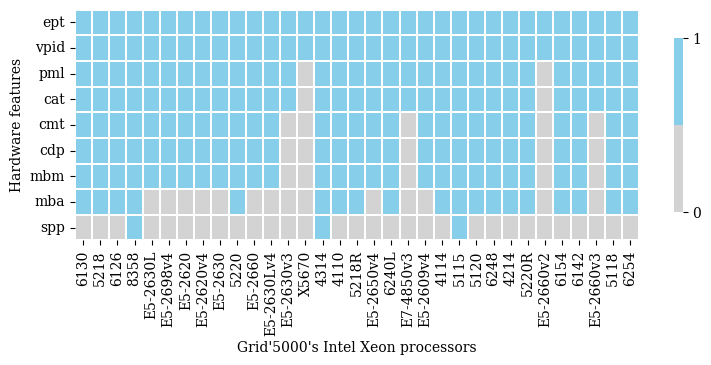

In [6]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))
font = {'family' : 'serif',
         'weight' : 'normal',
         'size'   : 10}

matplotlib.rc('font', **font)

colors = ["lightgray", "skyblue"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    
ax = sns.heatmap(df_g5k_hardware_features_.T, cmap=cmap, cbar_kws={"shrink": .2},
                      linewidths=.05, square=True)
ax.set_aspect(1.5)
    #ax.tick_params(labelrotation=0)

    # Set the colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0,1])
colorbar.set_ticklabels(['0', '1'])
    
    # Réduire la taille de la police sur l'axe Y
    #ax.yaxis.set_tick_params(labelsize=5.5)
plt.xlabel("Grid'5000's Intel Xeon processors")
plt.ylabel("Hardware features")
plt.xticks(rotation=90)
    #ax.set_xticks(rot)
plt.tight_layout()

path= "hardware_feature_dataset/"
#Export to pdf format
plt.savefig(path+"g5k_processor_hardware_feature.pdf", format="pdf", bbox_inches="tight")

#Export to svg format
plt.savefig(path+"g5k_processor_hardware_feature.svg", format="svg", bbox_inches="tight")
plt.show()